In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DemoGraphicDataPATH = "/Users/megantabbutt/BRT_data/DemographicData/csv_pwi/psam_p55.csv"
TimeTableConversionPATH = "/Users/megantabbutt/BRT_data/DemographicData/TimeConversiontable.csv"

In [3]:
timeConversionTable = pd.read_csv(TimeTableConversionPATH, header=None, index_col=1)
DemoGraphicData = pd.read_csv(DemoGraphicDataPATH)

In [4]:
timeConvertDict = timeConversionTable.to_dict()[0]

In [5]:
whiteBoolean = list(DemoGraphicData['RACWHT'])
print("Ratio white: ", np.average(whiteBoolean))

blackBoolean = list(DemoGraphicData['RACBLK'])
print("Ratio black: ", np.average(blackBoolean))

hispanicBoolean = [1 if i > 1 else 0 for i in list(DemoGraphicData['HISP'])]
print("Ratio hispanic: ", np.average(hispanicBoolean))

asianBoolean = (DemoGraphicData['RACASN'])
print("Ratio asian: ", np.average(asianBoolean))

Ratio white:  0.9282837230290977
Ratio black:  0.04099744288269015
Ratio hispanic:  0.04051276051677168
Ratio asian:  0.020741062624304314


In [6]:
whiteBoolean_TF = []
for i in whiteBoolean:
    if i==1:
        whiteBoolean_TF.append(True)
    else:
        whiteBoolean_TF.append(False)
print(np.average(whiteBoolean_TF))
whiteData = DemoGraphicData[whiteBoolean_TF]

0.9282837230290977


In [7]:
blackBoolean_TF = []
for i in blackBoolean:
    if i==1:
        blackBoolean_TF.append(True)
    else:
        blackBoolean_TF.append(False)
print(np.average(blackBoolean_TF))
blackData = DemoGraphicData[blackBoolean_TF]

0.04099744288269015


In [8]:
hispanicBoolean_TF = []
for i in hispanicBoolean:
    if i==1:
        hispanicBoolean_TF.append(True)
    else:
        hispanicBoolean_TF.append(False)
print(np.average(hispanicBoolean_TF))
hispanicData = DemoGraphicData[hispanicBoolean_TF]

0.04051276051677168


In [9]:
asianBoolean_TF = []
for i in asianBoolean:
    if i==1:
        asianBoolean_TF.append(True)
    else:
        asianBoolean_TF.append(False)
print(np.average(asianBoolean_TF))
asianData = DemoGraphicData[asianBoolean_TF]

0.020741062624304314


In [10]:
hours = [i for i in range(24)]

def getDictHours(data):
    DataHours = dict()
    for i in hours:
        DataHours[i] = 0

    for i in data:
        if i >=1.0 and i <= 150.0:
            hourTime = timeConvertDict[int(i)]
            DataHours[hourTime] += 1
    return DataHours
            
whiteDataHours = getDictHours(whiteData['JWDP'])
blackDataHours = getDictHours(blackData['JWDP'])
hispanicDataHours = getDictHours(hispanicData['JWDP'])
asianDataHours = getDictHours(asianData['JWDP'])

In [41]:
# Get the wieghts:

DemographicsWeightsHours = {'White':[], 'Black':[], 'Hispanic':[], 'Asian':[]}

totalPeople = len(DemoGraphicData)
expectedWhitesRatio = np.average(whiteBoolean_TF)
expectedBlacksRatio = np.average(blackBoolean_TF)
expectedHispanicRatio = np.average(hispanicBoolean_TF)
expectedAsianRatio = np.average(asianBoolean_TF)

for hour in hours:
    wNum = whiteDataHours[hour]
    bNum = blackDataHours[hour]
    hNum = hispanicDataHours[hour]
    aNum = asianDataHours[hour]
    totalHourWorkers = wNum + bNum + hNum + aNum
    
    wWeight = wNum / (totalHourWorkers * expectedWhitesRatio)
    bWeight = bNum / (totalHourWorkers * expectedBlacksRatio)
    hWeight = hNum / (totalHourWorkers * expectedHispanicRatio)
    aWeight = aNum / (totalHourWorkers * expectedAsianRatio)
    
    DemographicsWeightsHours['White'].append(wWeight)
    DemographicsWeightsHours['Black'].append(bWeight)
    DemographicsWeightsHours['Hispanic'].append(hWeight)
    DemographicsWeightsHours['Asian'].append(aWeight)

#DemographicsWeightsHours

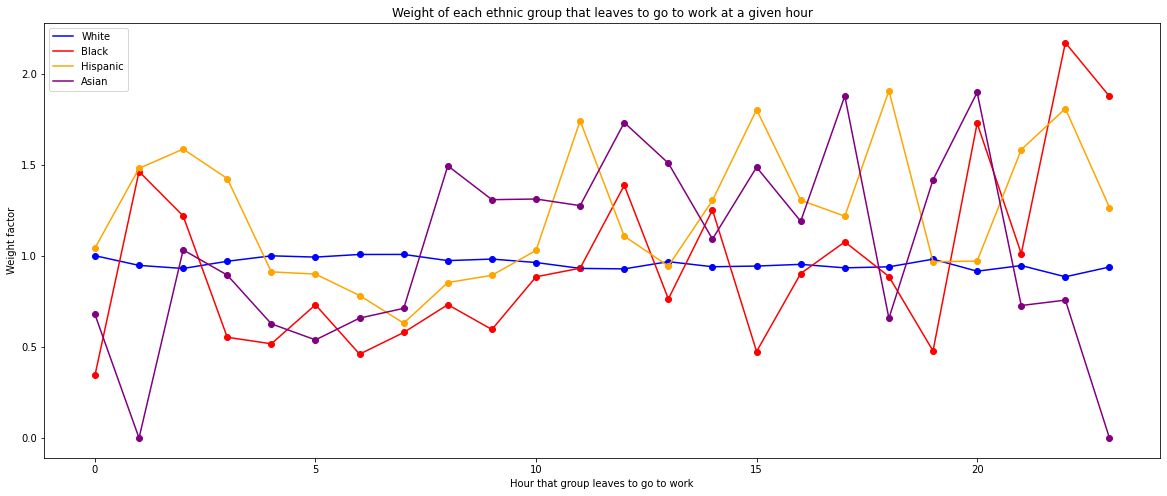

In [65]:
ax = plt.subplots(figsize=(20, 8))[1]

plt.plot(hours, DemographicsWeightsHours['White'], color='blue', label='White')
plt.scatter(hours, DemographicsWeightsHours['White'], color='blue')

plt.plot(hours, DemographicsWeightsHours['Black'], color='red', label='Black')
plt.scatter(hours, DemographicsWeightsHours['Black'], color='red')

plt.plot(hours, DemographicsWeightsHours['Hispanic'], color='orange', label='Hispanic')
plt.scatter(hours, DemographicsWeightsHours['Hispanic'], color='orange')

plt.plot(hours, DemographicsWeightsHours['Asian'], color='purple', label='Asian')
plt.scatter(hours, DemographicsWeightsHours['Asian'], color='purple')

plt.title("Weight of each ethnic group that leaves to go to work at a given hour")
plt.xlabel("Hour that group leaves to go to work")
plt.ylabel("Weight factor")
plt.legend()